In [0]:
# Fill in your name using the format below and student ID number
your_name = "TE SELLE, JUDITH"
student_id = "0951580"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

In [5]:
!pip install openml

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy

In [9]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi JUDITH, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = '/content/drive/My Drive/assignment-3-judithts'

In [11]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('content/drive/My Drive/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

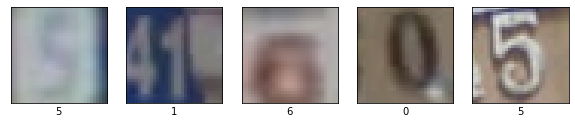

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.538974  0.183967 

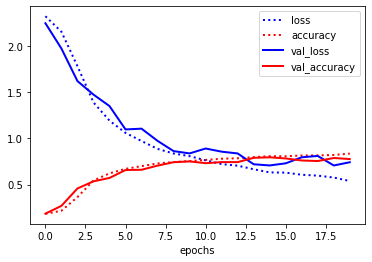

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3))) #reshapes rgb input
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=20, batch_size=512)

answer_q_1_1 = """No. of nodes: not too wide since this causes overfitting; not too narrow, since we need to learn 10 classes.
No. of layers: experiment: Tried different combinations of nodes and layers. Adding a fourth layer does not improve accuracy.
Optimizer: experiment: Adam gives me the best results.
No. of epochs: After 20 epochs the model starts overfitting.
Batch size: large dataset hence large batch size. Performance: The validation accuracy is well, but not good (0.79). It has a little bit of overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 1,708,298
Trainable params: 1,708,298
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.517993  0.190655 

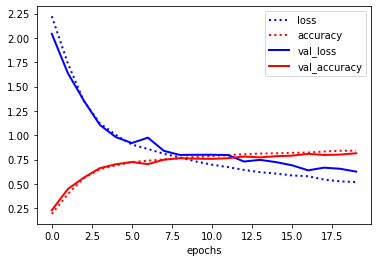

In [27]:
# preprocessing scaling and to_categorical already done
# Replace with the data rgb -> gray
X_traingrey = rgb2gray(X_train)
X_valgrey = rgb2gray(X_val)
preprocessed_split = X_traingrey, X_valgrey, y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=512)

answer_q_1_2 = """ I did not add any other preprocessing. The labels were already preprocessed to categoricals and the images were already
scaled by dividing them by 255. The model's validation accuracy has slightly improved (0.81) and the overfitting is a bit less. The model gets better
because its not longer 'distracted' by color. The color of the image is not important in determining the house number. Color can for example
be important in determining a kind of butterfly, but that is not the case here."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_21 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)

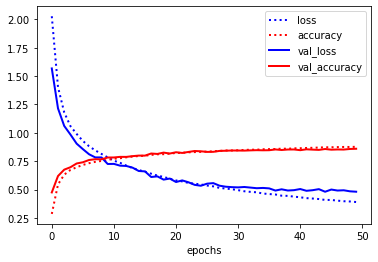

In [0]:
from keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
             train=False, epochs=50, batch_size=64)

answer_q_1_3 = """Model 1_2 does hardly overfit. Still, I tried if a regulizer would increase the performance.
I tried L1 and L2 regularization, Dropout, Batch Normalization and I fine-tuned the learning rate of Adam.
A learning rate of 0.0001 improves the model after 40 epochs. Dropout had also a positive effect, since it does not regularizes the weights
but breaks non-significant learning pattterns. Decreasing the batch size prevents the generalization gap. Model accuracy improved from 0.81 to 0.86 """

print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_40 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_41 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_52 (Dropout)

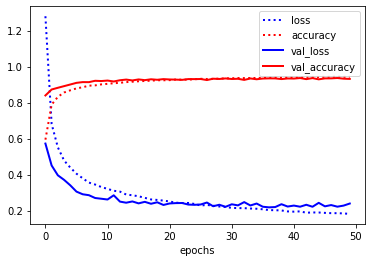

In [0]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
              train=False, epochs=50, batch_size=64)

answer_q_2_1 = """Three convolutional layers gets a good result. In deeper layers, increasingly more filters are used to preserve
the information as the resolution decreases. I compared the optimizers rmsprop, adam, adadelta, adagrad and adamax. 
Adamax gives me the best results (rmsprop gives also good results but is more 'peaky').
We have 32x32 images, which is a too high resolution to train the network: shrink the input tensors with MaxPooling.
The model overfits hugely: experiment with different regularization techniques: regularization l1 & l2, 
batch normalization and dropout. The gradual increasing of the dropout forces deeper layers to regularize more than layers closer to the input. 
I reach a val. accuracy of 0.94 and almost no overfitting, which is quite good!"""

print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_52 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_53 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_64 (Dropout)

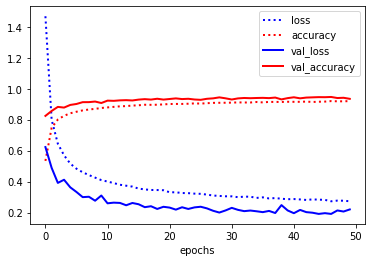

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.03,
    horizontal_flip=False,
    vertical_flip=False,)

steps = int(X_traingrey.shape[0] / 64)

augmented_split = train_datagen.flow(X_traingrey, y_train, batch_size=64), X_valgrey, y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir,
                train=False, generator=True, epochs=50, batch_size=None, steps_per_epoch = steps)


answer_q_2_2 = """ We get 1% improvement on val. accuracy. The best results are obtained with subtle data augmentation(small rotation and zoom range and small shifts)
Flips are totally disastrous for our data, since a '6' can become a '9' and so forth. Since our images are quite low in resolution, sheer will 
destroy too much information. The accuracy on our trained images is lower, so our original images are easier to recognize than the augmented ones. """

print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

621/621 [==============================] - 2s 3ms/step - loss: 0.2203 - accuracy: 0.9358


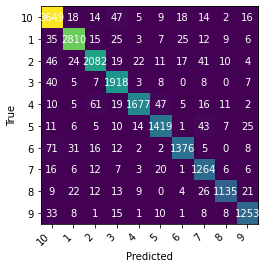

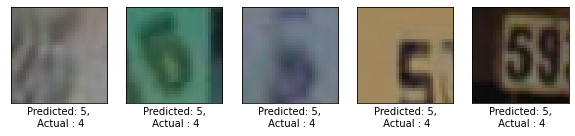

Answer is 419 characters long


In [30]:
from sklearn.metrics import confusion_matrix

model = load_model_from_file(base_dir, name="model_2_2", extension='.h5')

test_accuracy_3_1 = model.evaluate(rgb2gray(X_test), y_test)

def plot_confusion_matrix():
  X_testgrey = rgb2gray(X_test)
  y_pred = model.predict(X_testgrey)
  classes = {0: "10", 1: "1", 2: "2", 3: "3", 4: "4",
                 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(list(classes.values()), rotation=45, ha="right")
  ax.set_yticklabels(list(classes.values()))
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

cm = plot_confusion_matrix()

def plot_misclassifications():
  X_testgrey = rgb2gray(X_test)
  y_pred = model.predict(X_testgrey)
  classes = {0: "10", 1: "1", 2: "2", 3: "3", 4: "4",
                 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}
                 
  misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
  misclassified_class = []

  for i in misclassified_samples:
    if np.argmax(y_test[i]) == 4:
      if np.argmax(y_pred[i]) == 5:
        misclassified_class.append(i)

  fig, ax = plt.subplots(1, 5,  figsize=(10, 5))
  for nr, i in enumerate(misclassified_class[:5]):
        ax[nr].imshow(X_test[i])
        ax[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (classes[np.argmax(y_pred[i])],classes[np.argmax(y_test[i])]))
        ax[nr].set_xticks(()), ax[nr].set_yticks(())
  plt.show()

mc = plot_misclassifications()

answer_q_3_1 = """ We obtain a good test accuracy of 0.94!
Most often made mistake is predicting a 0 while it is a 6. Also often a 2 is predicted while it should be a 4.
In the visualizations you see most errors are due to the image not being sharp. Further on you could discuss the classification of some of the true labels.
I would rather say the last two images where the true label is 4, but there is predicted a 5, actually is a 5. """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


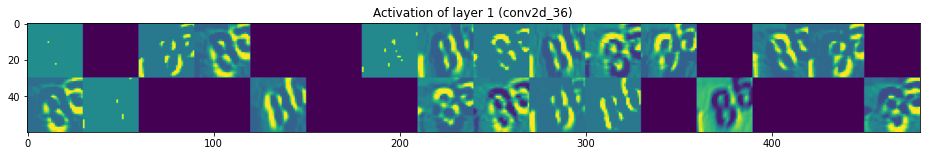

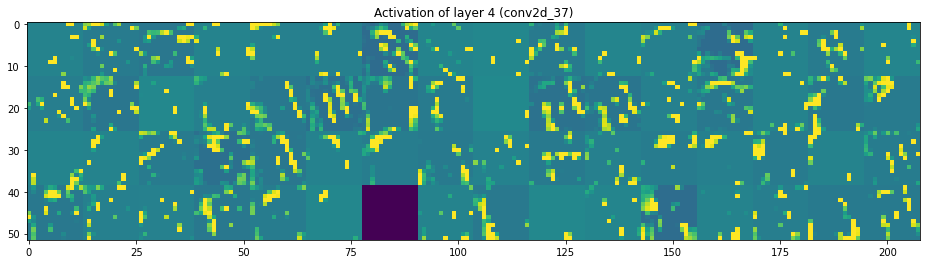

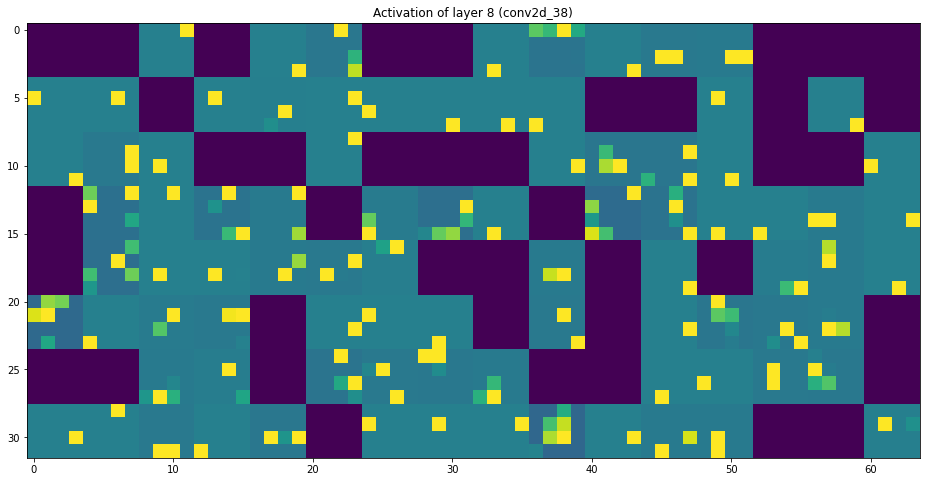

Answer is 494 characters long


In [35]:
def plot_activations():
    X_testgrey = rgb2gray(X_test)
    img_tensor = X_testgrey[0]

    model = load_model_from_file(base_dir, name="model_2_2", extension='.h5')

    img_tensor = np.expand_dims(img_tensor, axis=0) 

    # Extracts the outputs of the top 8 layers (includes all convolutional layers):
    layer_outputs = [layer.output for layer in model.layers[:8]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    # This will return a list of 5 Numpy arrays:
    # one array per layer activation
    activations = activation_model.predict(img_tensor)


    images_per_row = 16

    layer_names = []
    for layer in model.layers[:8]:
        layer_names.append(layer.name)

    layer_index = [0, 3, 7]
    for i in layer_index:
      start = i
      end = i+1
      # Now let's display our feature maps
      for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
          # This is the number of features in the feature map
          n_features = layer_activation.shape[-1]

          # The feature map has shape (1, size, size, n_features)
          size = layer_activation.shape[1]

          # We will tile the activation channels in this matrix
          n_cols = n_features // images_per_row
          display_grid = np.zeros((size * n_cols, images_per_row * size))

          # We'll tile each filter into this big horizontal grid
          for col in range(n_cols):
              for row in range(images_per_row):
                  channel_image = layer_activation[0,
                                                  :, :,
                                                  col * images_per_row + row]
                  # Post-process the feature to make it visually palatable
                  channel_image -= channel_image.mean()
                  channel_image /= channel_image.std()
                  channel_image *= 64
                  channel_image += 128
                  channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                  display_grid[col * size : (col + 1) * size,
                              row * size : (row + 1) * size] = channel_image

          # Display the grid
          scale = 1. / size
          plt.figure(figsize=(scale * display_grid.shape[1],
                              scale * display_grid.shape[0]))
          plt.title("Activation of layer {} ({})".format(i+1,layer_name))
          plt.grid(False)
          plt.imshow(display_grid, aspect='auto', cmap='viridis')

      plt.show()

plot_activations()

answer_q_3_2 = """The first convolutional layer pays attention to the edges of the number, which is quite useful in determining which number it is.
Layer 4 has already increasingly abstract patterns and the final layer is really abstract. To be critical on my model: the last layer could probably
be a bit less abstract in order to learn more. We see the first and last convolutional layer also contains some
empty filter activations: input image does not have the information that the filter was interested in. """

print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpose the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

tf.Tensor(
[[[-2.09765385e-05 -1.33957874e-05  6.46411063e-05 -1.77009606e-05]
  [-4.30378568e-05  3.15210964e-05  1.98593825e-05 -7.23170069e-06]
  [-1.89041402e-05  1.00522848e-04  1.18546384e-04  3.84124723e-05]
  [-2.21535811e-05 -3.35921068e-05 -1.57458326e-05  3.95460374e-05]]], shape=(1, 4, 4), dtype=float32)


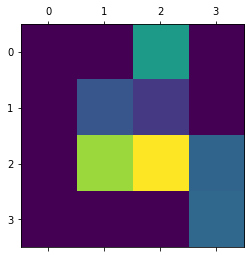

tf.Tensor(
[[[-2.09765385e-05 -1.33957874e-05  6.46411063e-05 -1.77009606e-05]
  [-4.30378568e-05  3.15210964e-05  1.98593825e-05 -7.23170069e-06]
  [-1.89041402e-05  1.00522848e-04  1.18546384e-04  3.84124723e-05]
  [-2.21535811e-05 -3.35921068e-05 -1.57458326e-05  3.95460374e-05]]], shape=(1, 4, 4), dtype=float32)


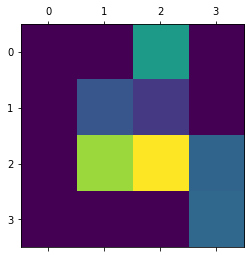

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


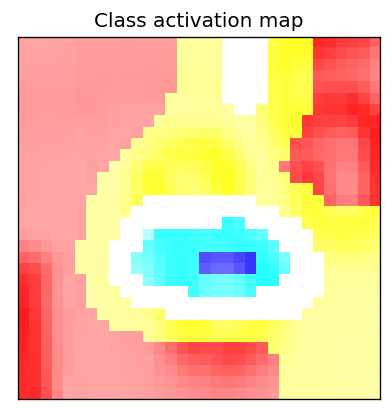

In [36]:
import tensorflow.keras.backend as K
import cv2

def plot_activation_map():
  X_testgrey = rgb2gray(X_test)
  img = X_testgrey[0]

  model = load_model_from_file(base_dir, name="model_2_2", extension='.h5')
  x = np.expand_dims(img, axis=0)

  # The output feature map of the last convolutional layer of the model named conv2d_65,
  #last_conv_layer = plot_activations(6, activations)    
  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('conv2d_38')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  print(heatmap)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((4, 4))
  plt.matshow(heatmap)
  plt.show()

  return heatmap

heatmap = plot_activation_map()


def plot_3_3():
  X_testgrey = rgb2gray(X_test)
  img = X_testgrey[0]

  heatmap = plot_activation_map()

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  plt.rcParams['figure.dpi'] = 120
  plt.imshow(superimposed_img)
  plt.title('Class activation map')
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Training the model
Epoch 1/50
993/993 [==============================] - 15s 15ms/step - loss: 1.7793 - accuracy: 0.3901 - val_loss: 1.4227 - val_accuracy: 0.5243
Epoch 2/50
993/993 [==============================] - 15s 15ms/step - loss: 1.3350 - accuracy: 0.5465 - val_loss: 1.1857 - val_accuracy: 0.6106
Epoch 3/50
993/993 [==============================] - 15s 15ms/step - loss: 1.1552 - accuracy: 0.6127 - val_loss: 1.0511 - val_accuracy: 0.6557
Epoch 4/50
993/993 [==============================] - 15s 15ms/step - loss: 1.0459 - accuracy: 0.6494 - val_loss: 0.9671 - val_accuracy: 0.6840
Epoch 5/50
993/993 [==============================] - 15s 15ms/step - loss: 0.9691 - accuracy: 0.6765 - val_loss: 0.9096 - val_accuracy: 0.7051
Epoch 6/50
993/993 [==============================] - 15s 15ms/step - loss: 0.9073 - accuracy: 0.6993 - val_loss: 0.8604 - val_accuracy: 0.7178
Epoch 7/50
993/993 [==============================] - 15s 15ms/step - loss: 0.8623 - accuracy: 0.7158 - val_loss: 0.8

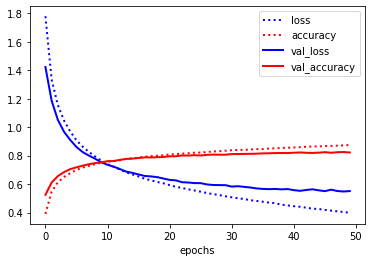

In [0]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape = (32, 32, 3))

# Fine-tuning
def build_model_4_1():
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  conv_base.trainable = True
  set_trainable = False
  for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

  model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(learning_rate=1e-5),
              metrics=['accuracy'])
  
  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=64)


answer_q_4_1 = """ The performance of the model with the freezed convolutional base is really bad, it has a accuracy of 0.47. The model that unfreezes
the last convolutional block performs much better: val. accuracy 0.82. This is due to the unfreezen model has way more 'learning opportunities'.
It is trained on 7,213,322 trainable parameters, whereas the freezen model is trained on 133,898 trainable parameters. 
Adding a dropout layer increased the performance. Other regularization did not add much performance."""

print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import model_from_json


def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)


def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings(X_test, X_train):
  model2 = load_model_from_file(base_dir, name="model_4_1", extension='.h5')
  print(model2.summary())

  model2.pop() # reshape layer
  model2.pop()
  model2.pop() # spatial softargmax
  print(model2.summary())

  X_test_embed = model2.predict(X_test)
  X_train_embed = model2.predict(X_train)

  store_embedding(X_test_embed, "X_test_embedded")
  store_embedding(X_train_embed, "X_train_embedded")
  
# store_embeddings(X_test, X_train)
# print("Generated newly stored embeddings")

def generate_pipeline():
  # Append classifier to preprocessing pipeline.
  
  pipe = Pipeline(steps=[('classifier', SVC(kernel='rbf', random_state=1))])

  return pipe


def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  score = pipeline.score(X_test, y_test)

  return score

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  X_train_embedded = load_embedding("X_train_embedded")
  X_test_embedded = load_embedding("X_test_embedded")
  print("Loading embeddings was succesfull")

  y_train_svm = np.argmax(y_train, axis=1, out=None)
  y_test_svm = np.argmax(y_test, axis=1, out=None)

  pipe = generate_pipeline()
  print("Succesfully generated pipeline")
  acc = evaluate_pipeline(pipe, X_train_embedded, y_train_svm, X_test_embedded, y_test_svm)

  return acc

accuracy = evaluation_4_2(X_train, y_train, X_test, y_test)
print(accuracy)

answer_q_4_2 = """ The scikit-learn pipeline with an RBF SVM classifier reaches an accuracy of 0.83. The randomforest classifier performes worse.
This accuracy is for a non-deep learning classifier quite okay on such a complex dataset. Since a non-deep learning technique never can beat my deep-learning models, 
I will not try to optimize the pipeline any further. """

print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Loading embeddings was succesfull
Succesfully generated pipeline
